In [62]:
%matplotlib inline

In [108]:
from PIL import Image
import matplotlib.pyplot as plot
import numpy as np
from scipy import signal as sg

(3264, 2448, 3)


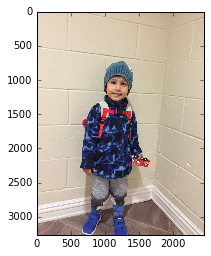

In [88]:
sourceURL = "/Users/ali.ghorbani/GoogleDrive/Classes/08 - CSE253/learnCode/jiaan1.jpg"
img = Image.open(sourceURL);
plt.imshow(img)
print(img.shape)

(3264, 2448)


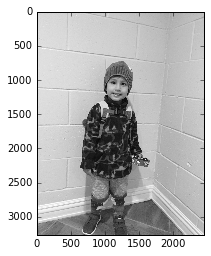

In [95]:
bw_img = np.dot(img, [0.299, 0.587, 0.114])
print bw_img.shape
plt.imshow(bw_img, cmap = plt.get_cmap('gray'))

In [96]:
edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1],[ -1, -1, -1]])
print edge_kernel.ndim

2


(3266, 2450)


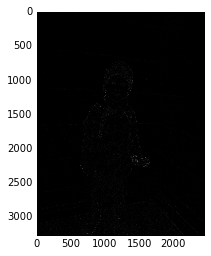

In [105]:

edge_output = sg.convolve(bw_img, edge_kernel)
print edge_output.shape
edge_output = 255.*np.absolute(edge_output)/np.max(edge_output)
plot.imshow(edge_output, cmap=plt.get_cmap('gray'))

In [ ]:
print img[:,:,1].shape
print edge_kernel.shape

In [ ]:
img[:,:,1].shape